In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# KEGG Ratios

- Compute the median KEGG for each HE, LS, CD, and UC cohort
- Compute the ratio of the median KEGG for LS, CD, and UC against HE
- Viusalize ratios
- Visualize only "extreme" ratios

In [2]:
df = pd.read_csv("../data/keggs-subjects-rf-scores.csv")

In [3]:
df.columns

Index(['kegg', 'over.abundant.health.conf', 'LS001', 'LS002', 'LS003', 'LS004',
       'LS005', 'LS006', 'LS007', 'CD.SRS301865', 'CD.SRS301866',
       'CD.SRS301867', 'CD.SRS301868', 'CD.SRS301869', 'CD.SRS301870',
       'CD.SRS301871', 'CD.SRS301872', 'CD.SRS301873', 'CD.SRS301874',
       'CD.SRS301875', 'CD.SRS301876', 'CD.SRS301877', 'CD.SRS301878',
       'CD.SRS301879', 'UC.SRS071964', 'UC.SRS071970', 'UC.SRS071978',
       'UC.SRS071981', 'UC.SRS071982', 'UC.SRS071988', 'HE.SRS011061',
       'HE.SRS011084', 'HE.SRS011134', 'HE.SRS011239', 'HE.SRS011271',
       'HE.SRS011302', 'HE.SRS011405', 'HE.SRS011452', 'HE.SRS011529',
       'HE.SRS011586', 'HE.SRS012273', 'HE.SRS012902', 'HE.SRS013158',
       'HE.SRS013215', 'HE.SRS013687', 'HE.SRS013951', 'HE.SRS014235',
       'HE.SRS014923', 'HE.SRS014979', 'HE.SRS015065', 'HE.SRS015217',
       'HE.SRS015578', 'HE.SRS015663', 'HE.SRS016018', 'HE.SRS016095',
       'HE.SRS016335', 'HE.SRS016495', 'HE.SRS017103', 'HE.SRS017433',
  

In [4]:
HE_df = df.filter(regex=("HE.*"))
LS_df = df.filter(regex=("LS.*"))
UC_df = df.filter(regex=("UC.*"))
CD_df = df.filter(regex=("CD.*"))

HE_median = HE_df.apply(lambda x: np.median(x), axis = 1)
LS_median = LS_df.apply(lambda x: np.median(x), axis = 1)
UC_median = UC_df.apply(lambda x: np.median(x), axis = 1)
CD_median = CD_df.apply(lambda x: np.median(x), axis = 1)

In [5]:
laplace_scale = 1e-9

In [6]:
LS_HE_median = (LS_median+laplace_scale)/(HE_median+laplace_scale)
UC_HE_median = (UC_median+laplace_scale)/(HE_median+laplace_scale)
CD_HE_median = (CD_median+laplace_scale)/(HE_median+laplace_scale)

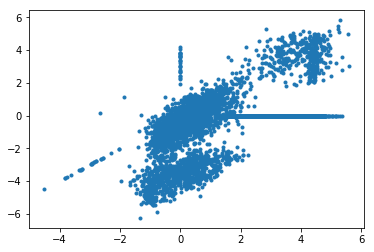

In [7]:
plt.plot(np.log10(LS_HE_median), np.log10(CD_HE_median), '.');

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go

import plotly.offline as offline
import plotly.plotly as py
from plotly.graph_objs import *




from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

offline.init_notebook_mode()

In [9]:
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=np.log10(LS_HE_median),
    y=np.log10(CD_HE_median),
    z=np.log10(UC_HE_median),
    text = list(df.kegg),
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)


data = [trace1]
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='x: LS to HE ratio'),
                    yaxis = dict(
                        title='y: CD to HE ratio'),
                    zaxis = dict(
                        title='z: UC to HE ratio'),),
                    width=700,
                    margin=dict(
        l=-50,
        r=0,
        b=0,
        t=0)
                  )
fig = go.Figure(data=data, layout=layout)


In [10]:
iplot(fig, filename='temp')

In [11]:
df_median_ratios = pd.DataFrame({"LS_HE_median_ratio": LS_HE_median, 
                                 "CD_HE_median_ratio": CD_HE_median, 
                                 "UC_HE_median_ratio": UC_HE_median, 
                                 "KEGG_names": df.kegg})

df_median_ratios.to_csv("../results/KEGG-median-HE-ratios-15-12-2017.csv", index = False)

In [12]:

#
# select KEGGs that are outside the "box" (ball in max norm) of KEGGs of radius 1.0
# compute the max norm over all keggs for the 3 different cohort ratios
#
radius = 5
kegg_magnitudes = np.max([np.abs(np.log10(LS_HE_median)),np.abs(np.log10(CD_HE_median)),np.abs(np.log10(UC_HE_median))], axis = 0)
print("number of keggs that are 5*10X more different", len(np.where(kegg_magnitudes > radius)[0]))

number of keggs that are 5*10X more different 67


In [13]:
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=np.log10(LS_HE_median[np.where(kegg_magnitudes > radius)[0]]),
    y=np.log10(CD_HE_median[np.where(kegg_magnitudes > radius)[0]]),
    z=np.log10(UC_HE_median[np.where(kegg_magnitudes > radius)[0]]),
    text = list(df.kegg[np.where(kegg_magnitudes > radius)[0]]),
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)


data = [trace1]
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='x: LS to HE ratio'),
                    yaxis = dict(
                        title='y: CD to HE ratio'),
                    zaxis = dict(
                        title='z: UC to HE ratio'),),
                    width=700,
                    margin=dict(
        l=-50,
        r=0,
        b=0,
        t=0)
                  )
fig = go.Figure(data=data, layout=layout)


In [14]:
iplot(fig)

In [15]:
## zero in two cohorts, but not the other

In [16]:
def get_cohort_significant_keggs(cohort, cohort_comparison_1, cohort_comparison_2, kegg_names):
    '''
    cohort: ratios of cohort of interest
    cohort_comparison_1: ratios of first cohort to compare to
    cohort_comparison_2: ratios of second cohort to compare to
    kegg_names: list of kegg names to get the kegg names out
    
    '''
    indx_where_comparison_cohorts_ratio_1 = np.where((cohort_comparison_1 == 1) & (cohort_comparison_2 == 1))[0]
    cohort_where_comparison_cohorts_ratio_1 = np.array(cohort[indx_where_comparison_cohorts_ratio_1])
    kegg_names_where_comparison_cohorts_ratio_1 = np.array(kegg_names[indx_where_comparison_cohorts_ratio_1])
    
    indx_cohort_significant = np.where(cohort_where_comparison_cohorts_ratio_1 != 1)[0]
    LS_significant = pd.Series(cohort_where_comparison_cohorts_ratio_1[indx_cohort_significant])
    significant_cohort_keggs = kegg_names_where_comparison_cohorts_ratio_1[indx_cohort_significant]
    
    return list(LS_significant), list(significant_cohort_keggs)

In [17]:
LS_significant, LS_sig_KEGGs = get_cohort_significant_keggs(LS_HE_median, 
                                                            UC_HE_median, 
                                                            CD_HE_median, 
                                                            kegg_names=df.kegg)

CD_significant, CD_sig_KEGGs = get_cohort_significant_keggs(CD_HE_median, 
                                                            UC_HE_median, 
                                                            LS_HE_median, 
                                                            kegg_names=df.kegg)

UC_significant, UC_sig_KEGGs = get_cohort_significant_keggs(UC_HE_median, 
                                                            LS_HE_median, 
                                                            CD_HE_median, 
                                                            kegg_names=df.kegg)



In [21]:
df_LS_sig = df_median_ratios[df_median_ratios["KEGG_names"].isin(LS_sig_KEGGs)]
df_UC_sig = df_median_ratios[df_median_ratios["KEGG_names"].isin(UC_sig_KEGGs)]
df_CD_sig = df_median_ratios[df_median_ratios["KEGG_names"].isin(CD_sig_KEGGs)]

df_sig = pd.concat([df_LS_sig, df_UC_sig, df_CD_sig])

df_sig.to_csv("../results/discriminative-KEGGs-median-HE-ratios-15-12-2017.csv", index=False)

In [19]:
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=np.log10(df_sig.LS_HE_median_ratio),
    y=np.log10(df_sig.CD_HE_median_ratio),
    z=np.log10(df_sig.UC_HE_median_ratio),
    text = list(df_sig.KEGG_names),
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)


data = [trace1]
layout = go.Layout( scene = dict(
                    xaxis = dict(
                        title='x: LS to HE ratio'),
                    yaxis = dict(
                        title='y: CD to HE ratio'),
                    zaxis = dict(
                        title='z: UC to HE ratio'),),
                    width=700,
                    margin=dict(
        l=-50,
        r=0,
        b=0,
        t=0)
                  )
fig = go.Figure(data=data, layout=layout)



In [20]:
iplot(fig)